#Libraries:

In [1]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
import numpy as np 
import plotly
import matplotlib.pyplot as plt 
import seaborn as sns 

import missingno as msno
import warnings
warnings.filterwarnings("ignore")

#Data Preparation:

In [4]:
#from google.colab import files
#uploaded = files.upload()

In [5]:
data = pd.read_csv("water_portability.csv")
df = pd.DataFrame(data)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
df.shape

(3276, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [10]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

There is an imbalance of data for the target variable. Non poptable samples have been oversampled versus the potatble samples.

<AxesSubplot:xlabel='Potability', ylabel='count'>

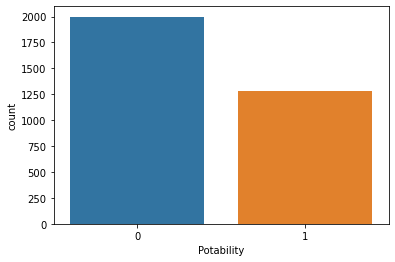

In [11]:
sns.countplot(data = df, x = 'Potability')

<AxesSubplot:ylabel='Potability'>

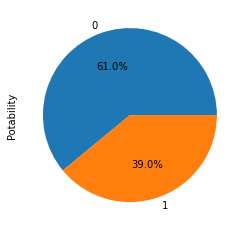

In [12]:
#df.Potability.value_counts().plot(kind ='pie')
df.Potability.value_counts().plot(kind='pie', autopct='%1.1f%%')


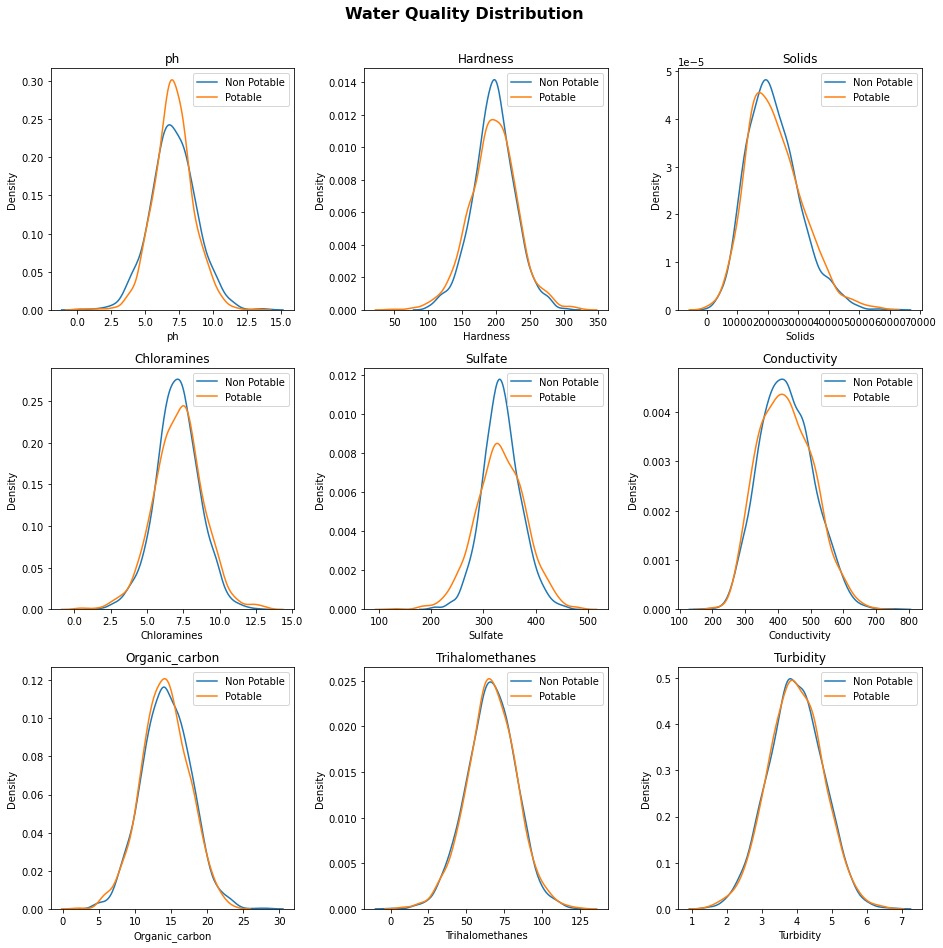

In [13]:
non_potable = df[df['Potability'] == 0]
potable = df[df['Potability'] == 1]

plt.figure(figsize=(13,13))

for ax,col in enumerate(df.columns[:9]):
    plt.subplot(3,3,ax+1)
    plt.title(col)
    sns.kdeplot(x=non_potable[col],label = "Non Potable")
    sns.kdeplot(x=potable[col],label = "Potable")
    plt.legend()

plt.suptitle('Water Quality Distribution',y=1.01, size = 16, color = 'black', weight='bold')   
plt.tight_layout()

In [14]:
df.drop('Potability', axis=1).skew()

ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
dtype: float64

Distirbution of the data is mostly Gaussian.

In [15]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


Text(0.5, 0.92, 'Water Quality Heat Map')

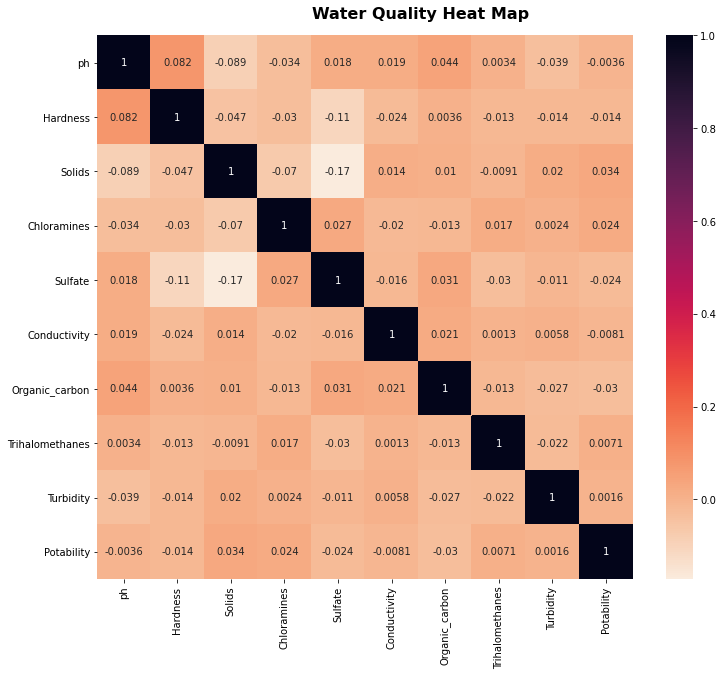

In [16]:
plt.figure(figsize = (12,10))
cmap = sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(df.corr(), annot = True, cmap=cmap)
plt.suptitle('Water Quality Heat Map', y = 0.92, size = 16, color = 'black', weight='bold')


In [17]:
df.corr().abs()['Potability'].sort_values(ascending = False)

Potability         1.000000
Solids             0.033743
Organic_carbon     0.030001
Chloramines        0.023779
Sulfate            0.023577
Hardness           0.013837
Conductivity       0.008128
Trihalomethanes    0.007130
ph                 0.003556
Turbidity          0.001581
Name: Potability, dtype: float64

<Figure size 1152x1152 with 0 Axes>

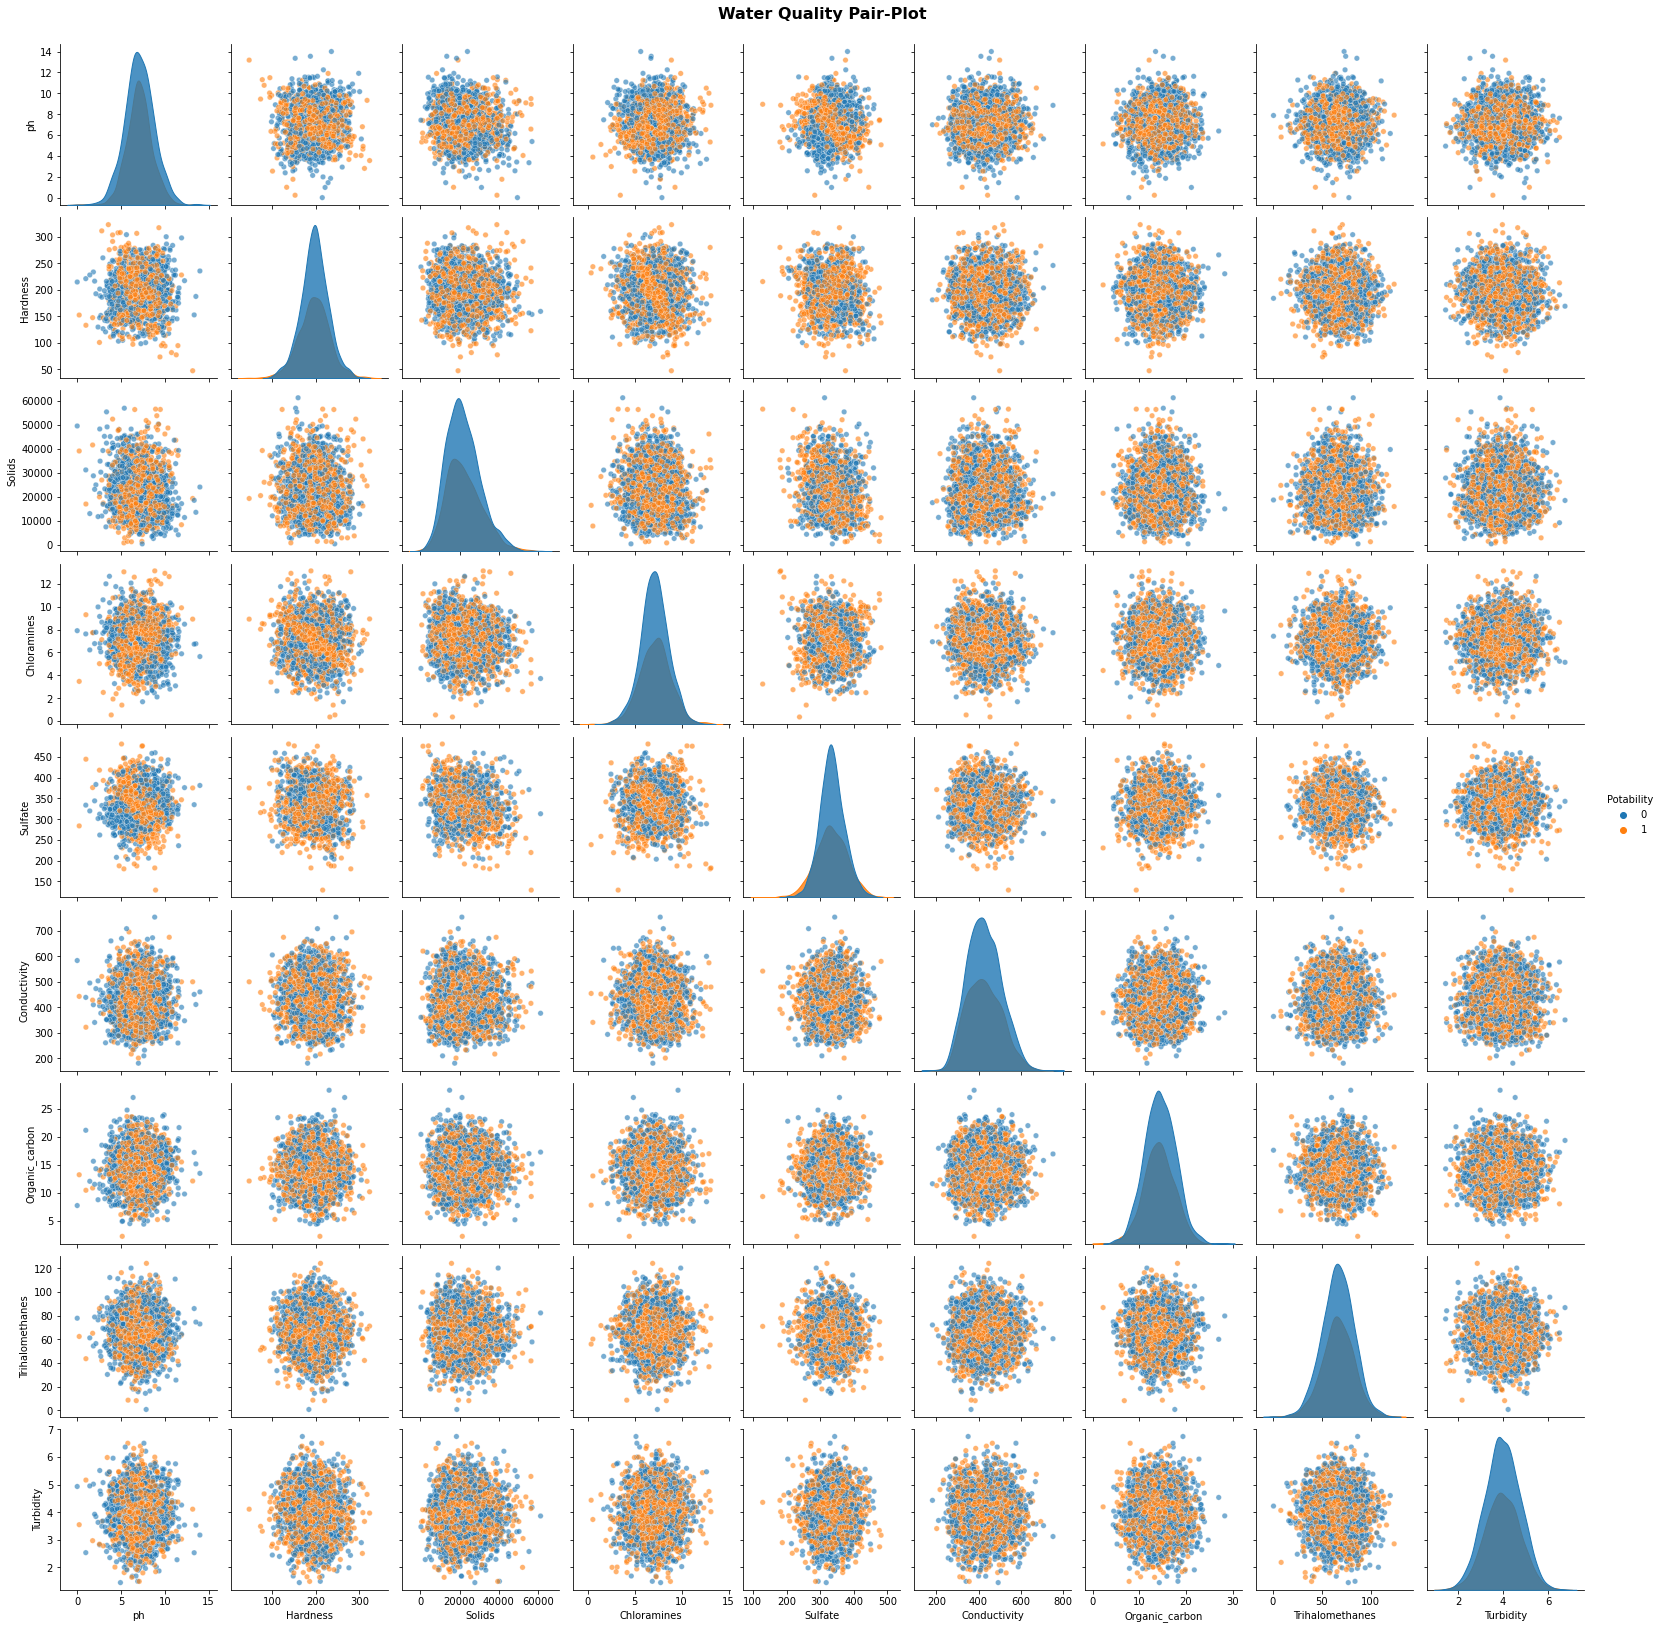

In [18]:
# Split the data into potable and non-potable groups
potable = df[df['Potability'] == 1]
non_potable = df[df['Potability'] == 0]

# Set the figure size
plt.figure(figsize=(16, 16))

# Create a pairplot with scatter plots on the off-diagonal and kernel density estimates on the diagonal
sns.pairplot(data=df, hue='Potability', diag_kind='kde', kind='scatter',
             plot_kws=dict(s=30, alpha=0.6), diag_kws=dict(alpha=0.8))

# Set the title of the figure
plt.suptitle('Water Quality Pair-Plot', y=1.01, size=16, color='black', weight='bold')

# Show the plot
plt.show()


Both the correlation heatmap and pairplots between the variables show that there are no clear linear relationships between the features and the target variable. We can rule out using a simple linear model.

Text(0.5, 1.01, 'Water Quality Box-Plot')

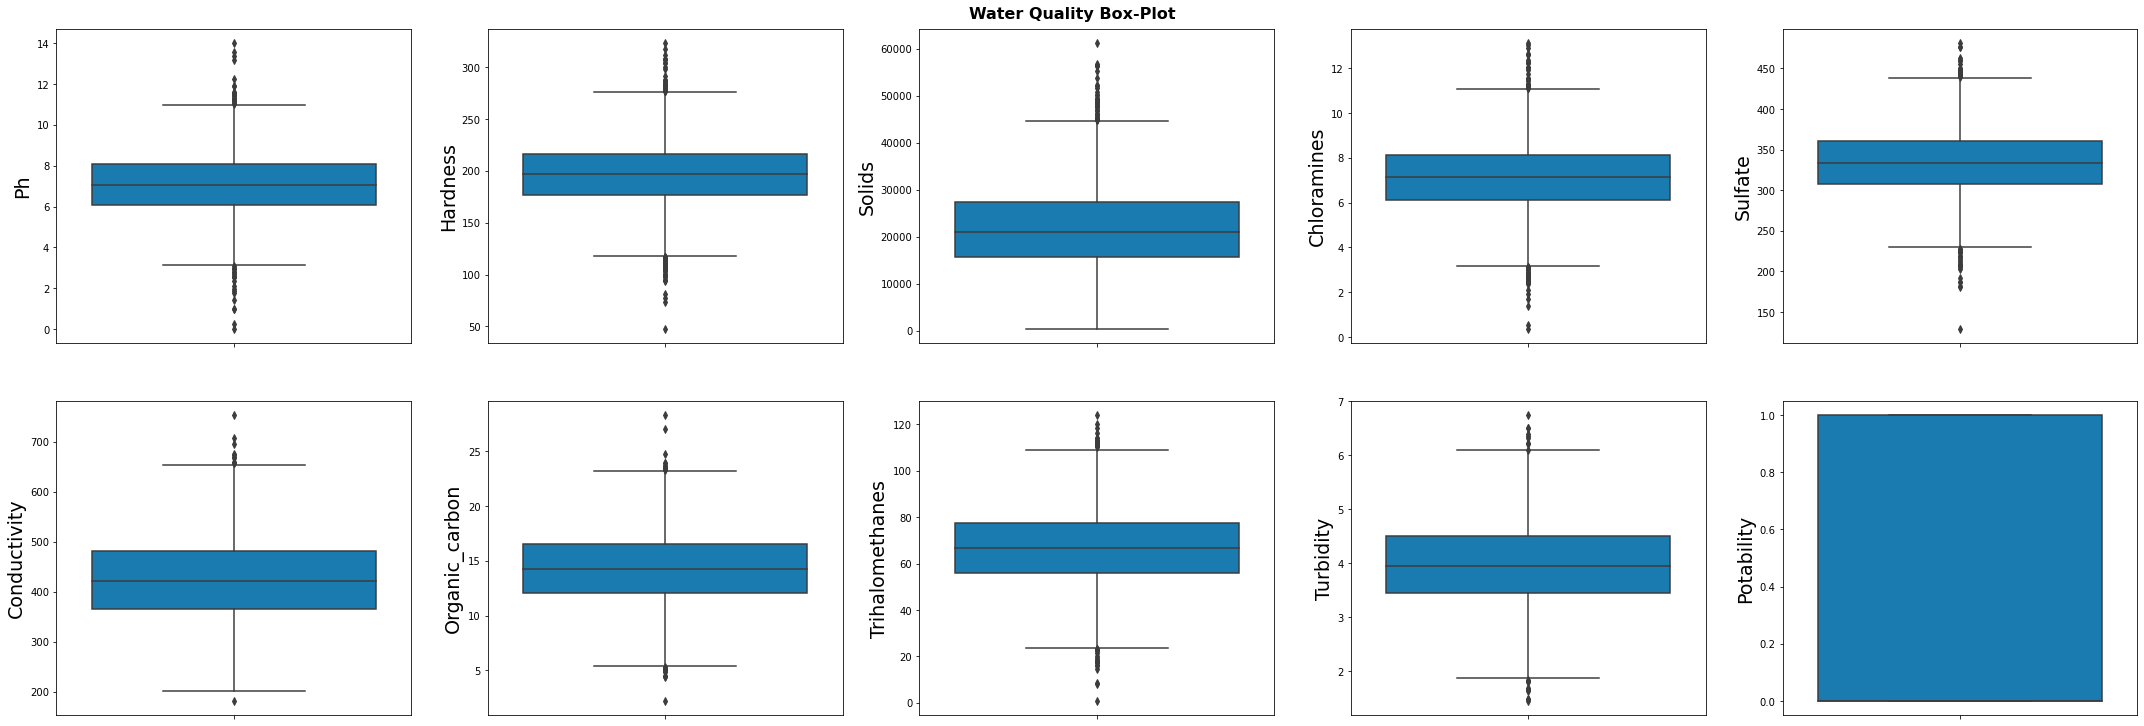

In [19]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(30,10))
index = 0
ax = ax.flatten()

for attributeCol, value in df.items():
    sns.boxplot(y=attributeCol, data=df, ax=ax[index], color='#0082c8')
    ax[index].set_ylabel(attributeCol.capitalize(), fontsize=19)
    index += 1
plt.tight_layout(pad=1.5, w_pad=1.5, h_pad=5.0)

plt.suptitle('Water Quality Box-Plot',y=1.01, size = 16, color = 'black', weight='bold')


There are outliers within every feature of the dataset.

### Dealing with Missing Values

In [20]:
df.isna().any().any()

True

In [21]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

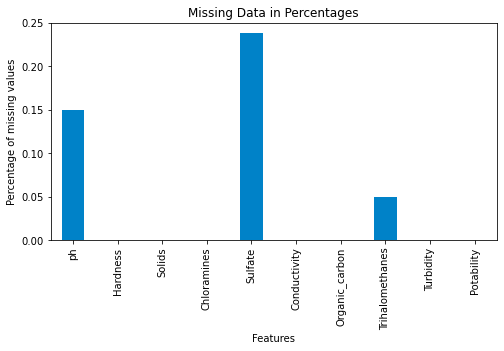

In [22]:
df.isnull().mean().plot.bar(figsize=(8,4), color='#0082c8') 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

In [23]:
df.isnull().mean()*100 

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [24]:
df[df['Potability']==0][['ph','Sulfate','Trihalomethanes']].mean()

ph                   7.085378
Sulfate            334.564290
Trihalomethanes     66.303555
dtype: float64

In [25]:
df[df['Potability']==1][['ph','Sulfate','Trihalomethanes']].mean()

ph                   7.073783
Sulfate            332.566990
Trihalomethanes     66.539684
dtype: float64

The three features with missing values all have Gaussian distribution therefore it is a safe assumption to use the mean of each feature to fill in for the missing values.

In [26]:
df1 = df.copy()
df1['ph'].fillna(value=df1['ph'].mean(),inplace=True)
df1['Sulfate'].fillna(value=df1['Sulfate'].mean(),inplace=True)
df1['Trihalomethanes'].fillna(value=df1['Trihalomethanes'].mean(),inplace=True)

In [27]:
df1.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Dealing with Outliers

Since the features have Gaussian distribution we can trim out the outliers data outside of 3 standard deviations.

In [28]:
from scipy import stats

df_water = df1.copy()
df_water = df_water[(np.abs(stats.zscore(df1)) <= 3).all(axis=1)]

In [29]:
df_water.shape

(3128, 10)

Text(0.5, 1.01, 'Water Quality Box-Plot (after outlier trimming)')

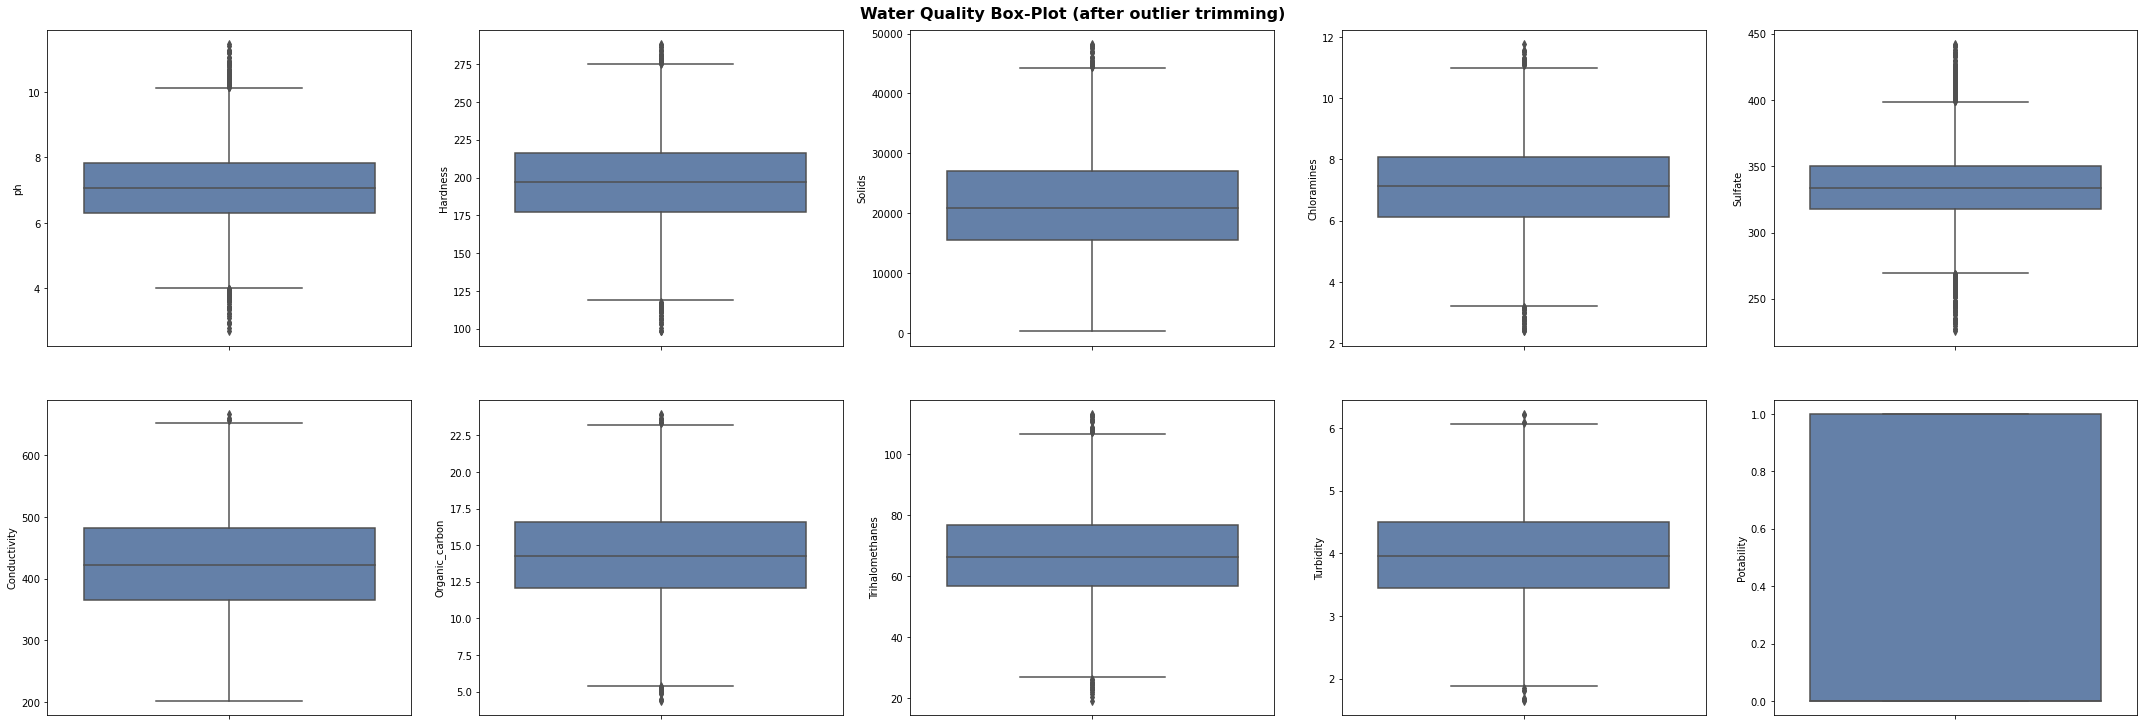

In [30]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(30,10))
index = 0
ax = ax.flatten()

for attributeCol, value in df_water.items():
    sns.boxplot(y=attributeCol, data=df_water, ax=ax[index], color='#597eb3')
    index += 1
plt.tight_layout(pad=1.5, w_pad=1.5, h_pad=5.0)
plt.suptitle('Water Quality Box-Plot (after outlier trimming)',y=1.01, size = 16, color = 'black', weight='bold')

### Dealing with Class Imbalance

In [31]:
count_class_0, count_class_1 = df_water.Potability.value_counts()

df_class_0 = df_water[df_water['Potability'] == 0]
df_class_1 = df_water[df_water['Potability'] == 1]

Random over-sampling:
0    1930
1    1930
Name: Potability, dtype: int64


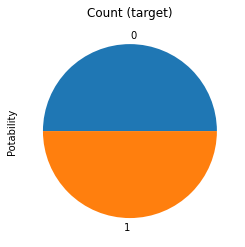

In [32]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Potability.value_counts())

df_test_over.Potability.value_counts().plot(kind='pie', title='Count (target)');

### Exploring correlation using ANOVA

In [33]:
def FunctionAnova(inpData, TargetVariable, attributeList):
    from scipy.stats import f_oneway

    SelectedPredictors=[]
    
    for predictor in attributeList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If p-value <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, ', P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, ', P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [34]:
attributeColList = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']

FunctionAnova(inpData=df_water, TargetVariable='Potability', attributeList=attributeColList)

ph is NOT correlated with Potability , P-Value: 0.7393007692679345
Hardness is NOT correlated with Potability , P-Value: 0.5152019551100953
Solids is NOT correlated with Potability , P-Value: 0.24376029399252427
Chloramines is NOT correlated with Potability , P-Value: 0.38895878135633166
Sulfate is NOT correlated with Potability , P-Value: 0.8121224592001397
Conductivity is NOT correlated with Potability , P-Value: 0.67278748123374
Organic_carbon is NOT correlated with Potability , P-Value: 0.29594883023494456
Trihalomethanes is NOT correlated with Potability , P-Value: 0.6801397413373995
Turbidity is NOT correlated with Potability , P-Value: 0.8294778118624652


[]

ANOVA testing determine that there not any features that correlate with the target variable Potability with an acceptable P-Value.

In [35]:
df_test_over.to_csv("water_portability_cleaned.csv", index=False)
